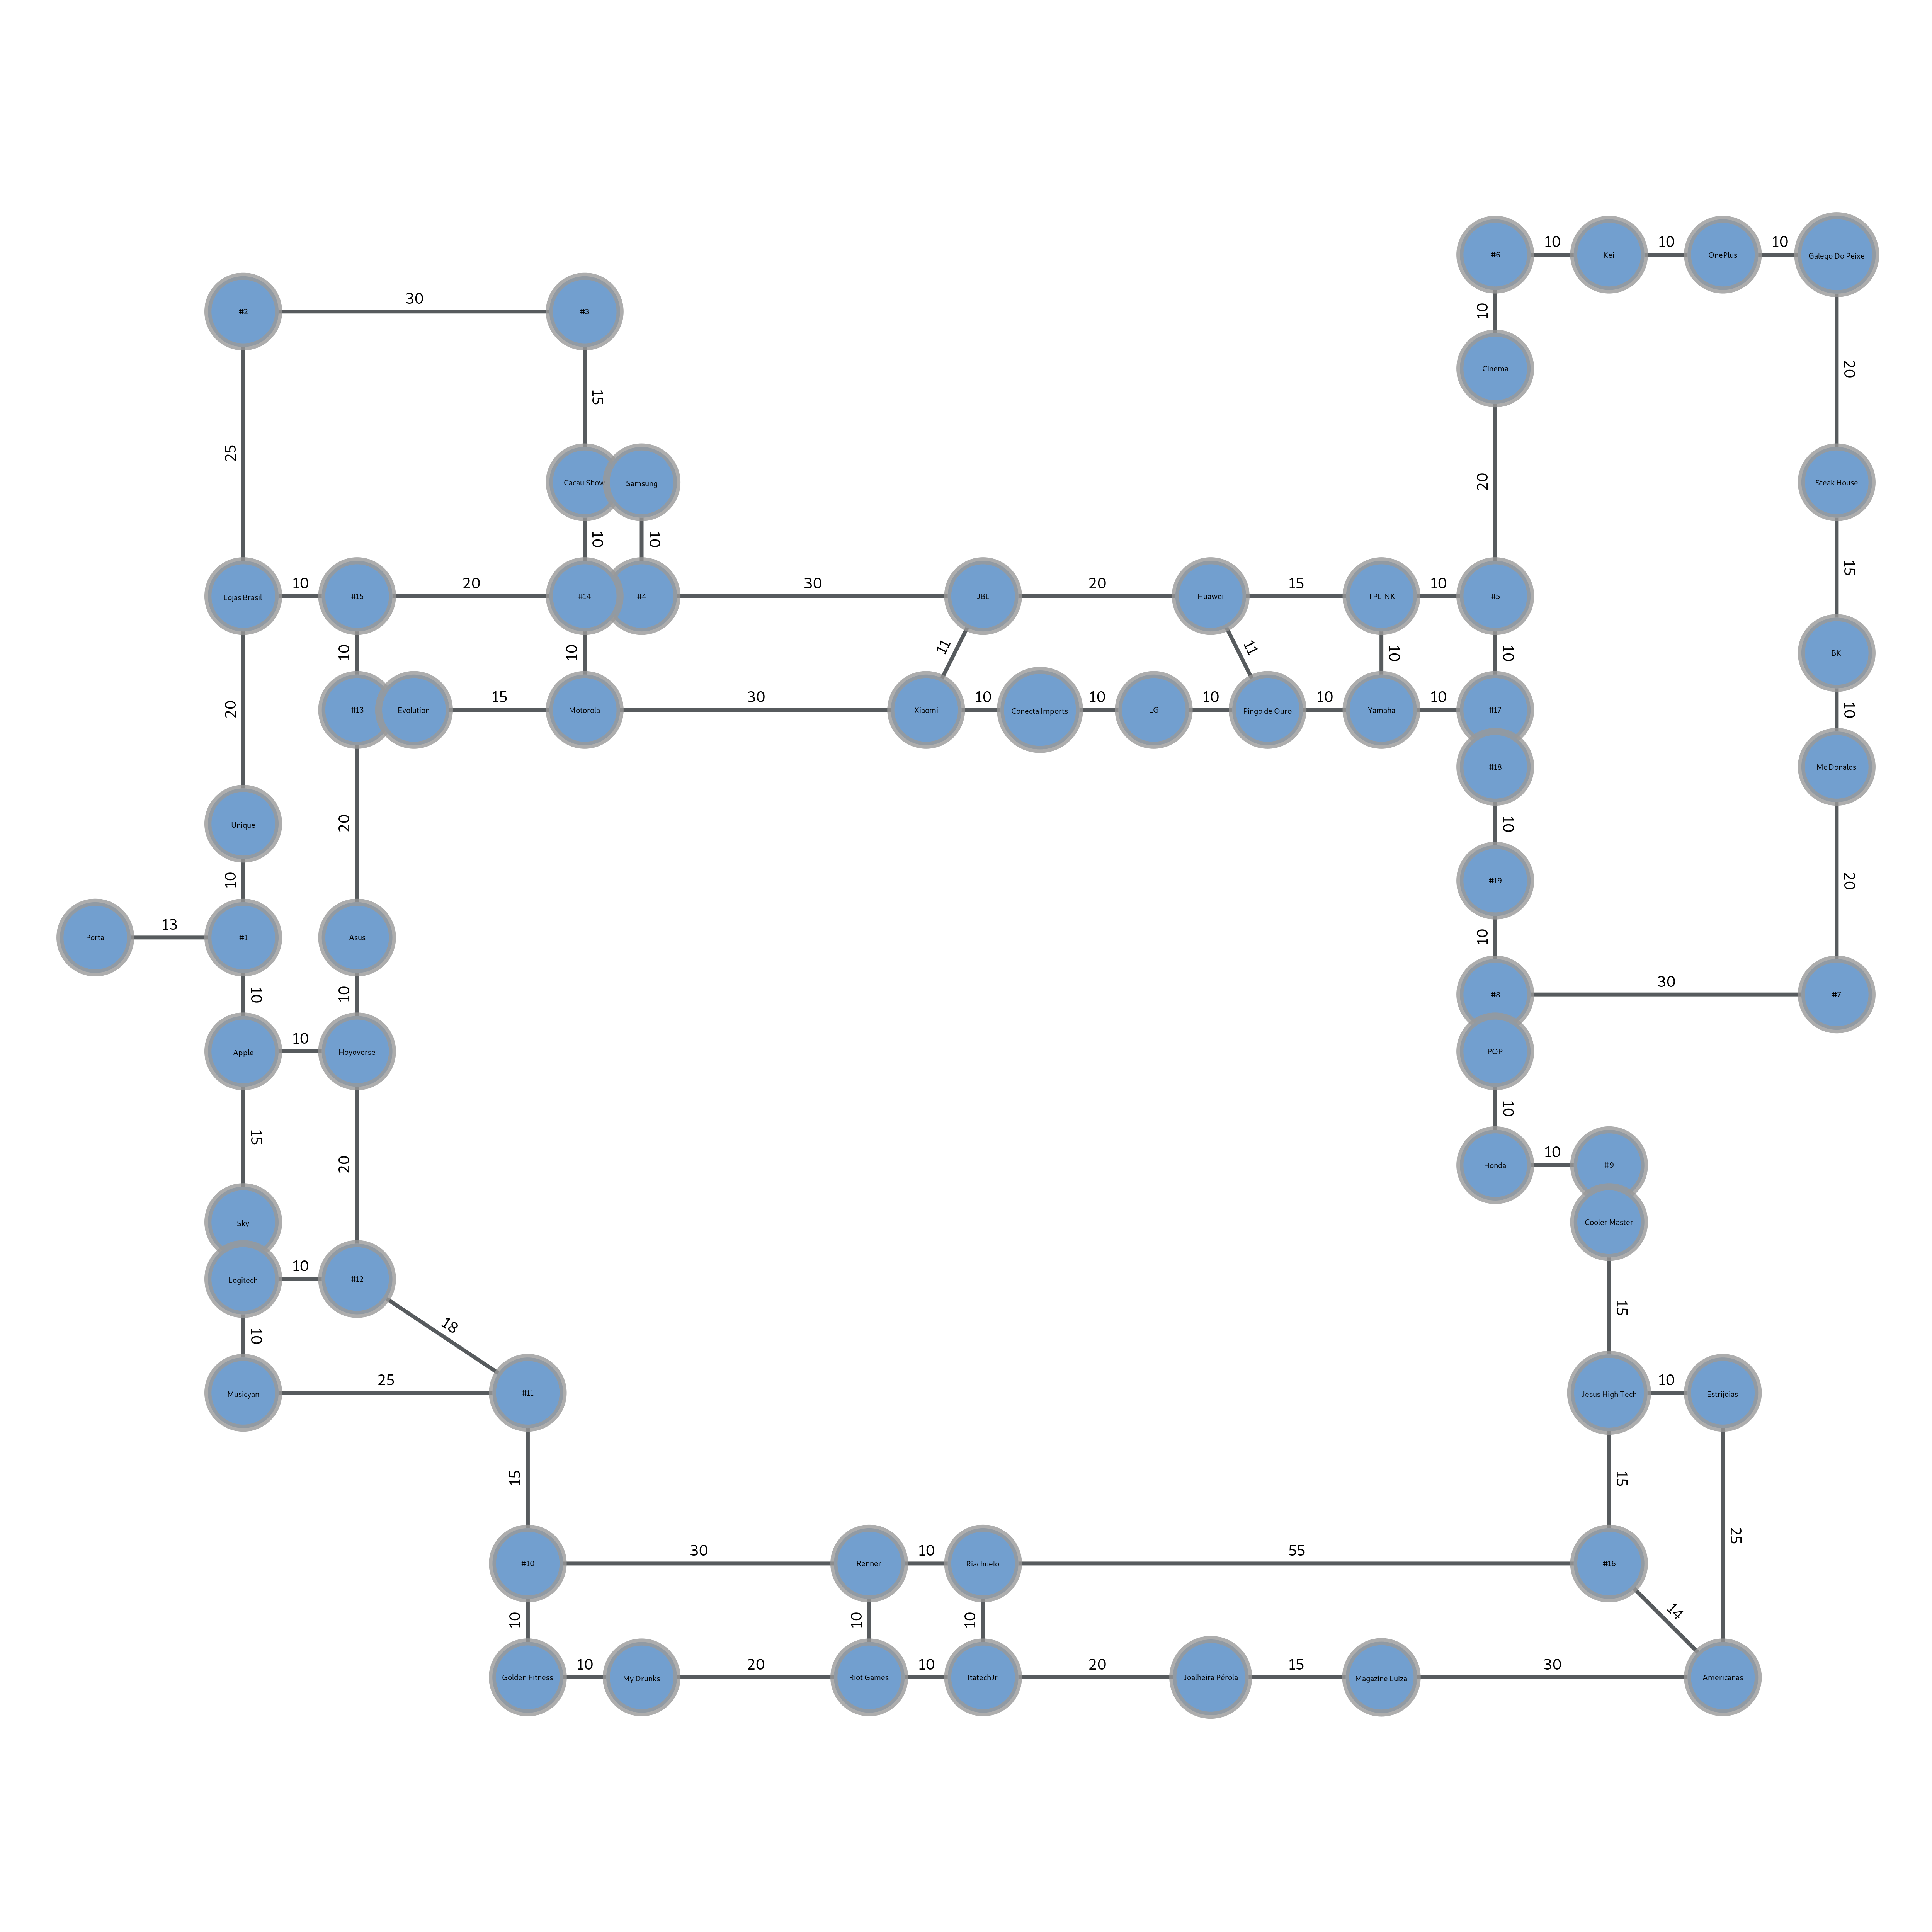

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fa8b6163080, at 0x7fa8b4114860>

In [1]:
import graph_tool.all as gt                       # Biblioteca para GRAFO
import csv                                        # Biblioteca para Leitura do csv

g = gt.Graph() 
g.set_directed(False)                             # criação do objeto
v_name = g.new_vertex_property("string")          # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string  
v_pos  = g.new_vertex_property("vector<double>")
e_distance = g.new_edge_property("string") 
#Criação dos vértices no grafo à partir do arquivo .csv de vértices
f_network = open("vertices.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")

vposX = []
vposY = []
for vertice in reader_network:
    v = g.add_vertex()
    v_name[v] = str(vertice[1]) # Adicionando nome do vertice
    vposX.append(vertice[5]) # Adicionando posição X
    vposY.append(vertice[6]) # Adicionando posição Y
f_network.close()

#Criação das arestas no grafo à partir do arquivo .cvs de arestas
f_network = open("arestas.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")
for edge in reader_network:
    e = g.add_edge(int(edge[0]), int(edge[1]))
    e_distance[e] = str(edge[3])
    
f_network.close()

#Preenchendo as posições X e Y dos vértices
for v in g.vertices():
    v_pos[v] = (vposX[int(v)],vposY[int(v)])

#Desenhando o grafo
gt.graph_draw(g, pos=v_pos, #pos=gt.arf_layout(visual_G),
               vertex_text= v_name,
               edge_text = e_distance,
               edge_pen_width = 10,              
               vertex_font_size=20,
               edge_font_size = 40,
               vertex_shape="circle",
               vertex_fill_color="#729fcf",
               output_size=(5000, 5000))
               #output="two-nodes.png")

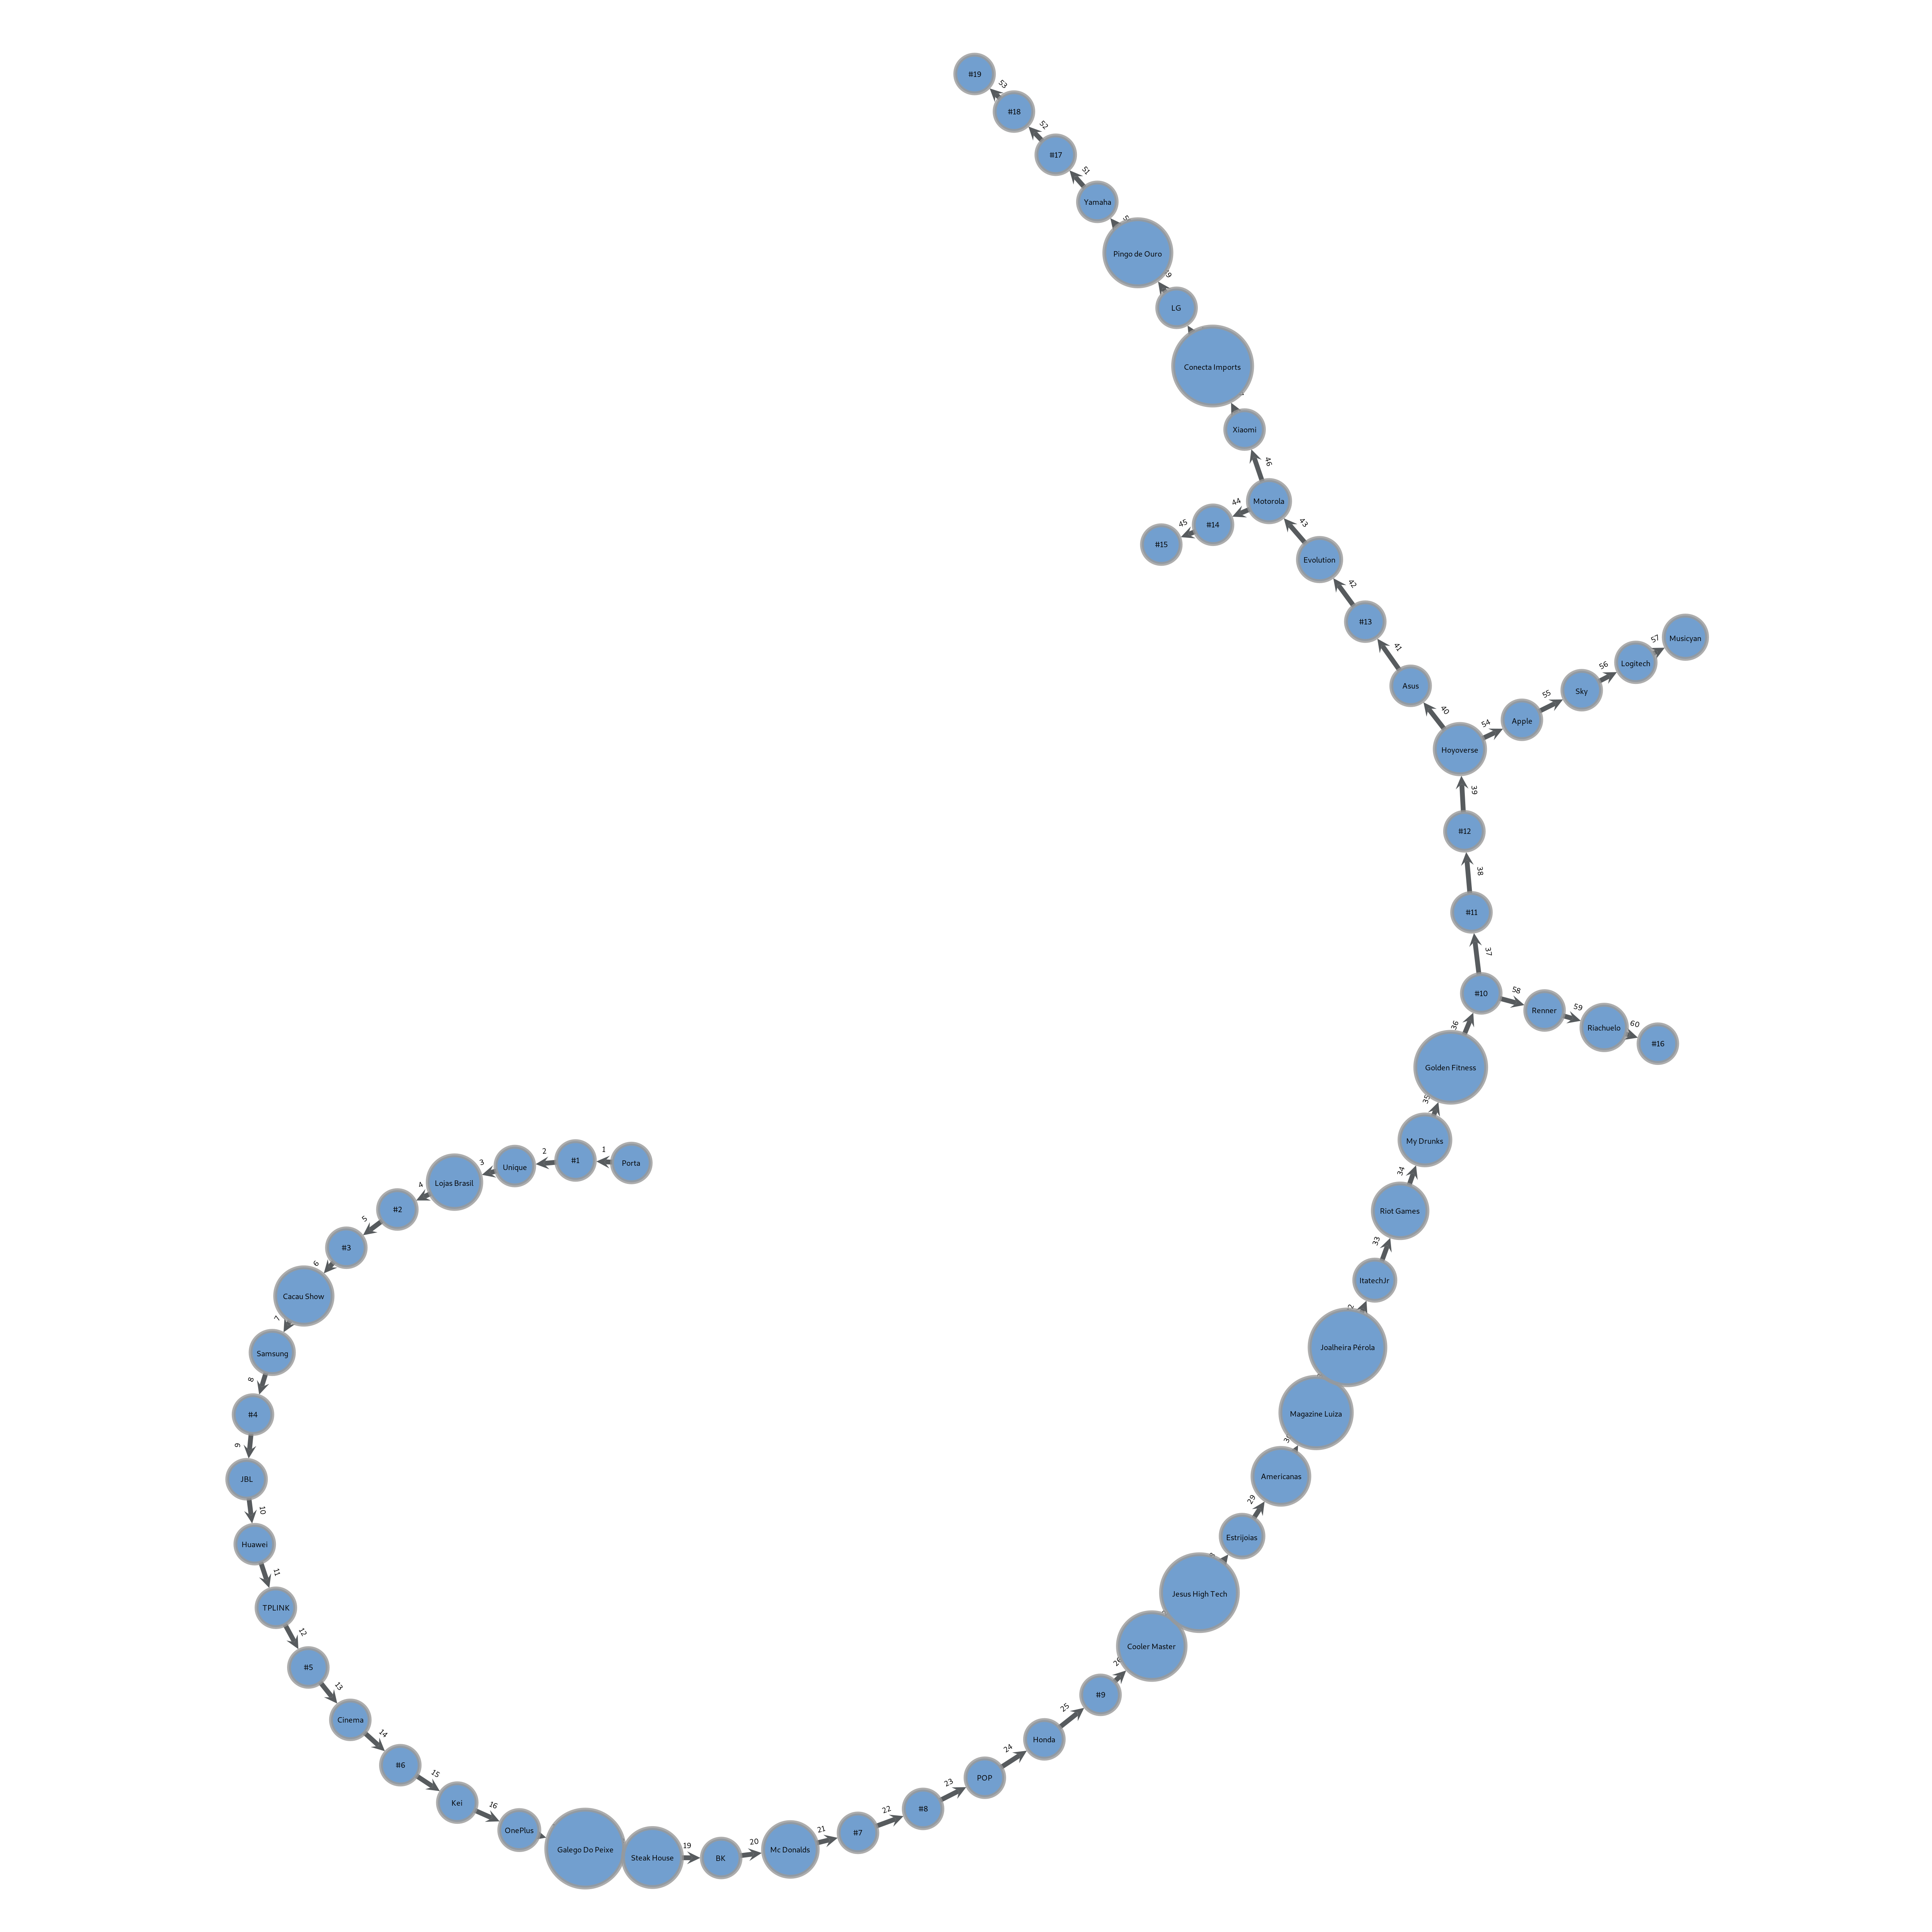

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fa8786ef5f8, at 0x7fa8786efa58>

In [2]:
import graph_tool.all as gt                           # Biblioteca para GRAFO
g_dfs = gt.Graph()                                    # criação do objeto para busca em Largura
v_name_dfs = g_dfs.new_vertex_property("string")      # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string 
e_ord = g_dfs.new_edge_property("int")                # referenciação da lista e_ord com uma nova propriedade criada para a ordem de expansão - tipo int

f_network = open("vertices.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")
for vertice in reader_network:
    v = g_dfs.add_vertex()
    v_name_dfs[v] = str(vertice[1])
f_network.close()

ord = 1
for edge in gt.dfs_iterator(g, g.vertex(0)):
   #print(v_name[int(edge.source())], "->", v_name[int(edge.target())])
   e = g_dfs.add_edge(int(edge.source()), int(edge.target()))
#  print(vertice[1])
   e_ord[e] = ord
   ord += 1

#Desenhando o grafo
size = 5000
v_size = size / 50
e_pwidth = v_size / 8
gt.graph_draw(g_dfs,#pos=gt.sfdp_layout(g_bfs),
              vertex_size = v_size,
              vertex_text= v_name_dfs,
              edge_text= e_ord,
              vertex_font_size=20,
              edge_font_size = 20,
              edge_pen_width = e_pwidth,
              vertex_shape="circle",
              vertex_fill_color="#729fcf",
              output_size=(size, size))
              #output="two-nodes.png")      



In [3]:
class No_Raiz_Tree:         
      def __init__(self, key, source, treeDestiny):
            self.key = key
            self.source = source
            self.treeDestiny = treeDestiny
            self.left = None
            self.right = None
            self.height = 1
            
class No_Destino_Tree:
       def __init__(self, chave, destino, path):
            self.key = chave
            self.destiny = destino
            self.left = None
            self.right = None
            self.path = path
            self.height = 1
            
class AVL_Tree(object):
    #criar metodo init
    def __init__(self):
        self.root = None
        
    # Recursive function to insert key in
    # subtree rooted with node and returns
    # new root of subtree.
    def insert(self, root, key, source, treeDestiny):
     
        # Step 1 - Perform normal BST
        if not root:
            #print("inserindo")
            return No_Raiz_Tree(key, source, treeDestiny)
        elif key < root.key:
            root.left = self.insert(root.left, key, source, treeDestiny)
        else:
            root.right = self.insert(root.right, key, source, treeDestiny)
 
        # Step 2 - Update the height of the
        # ancestor node
        root.height = 1 + max(self.getHeight(root.left),
                           self.getHeight(root.right))
 
        # Step 3 - Get the balance factor
        balance = self.getBalance(root)
 
        # Step 4 - If the node is unbalanced,
        # then try out the 4 cases
        # Case 1 - Left Left
        if balance > 1 and key < self.root.left.key:
            return self.rightRotate(root)
 
        # Case 2 - Right Right
        if balance < -1 and key > root.right.key:
            return self.leftRotate(root)
 
        # Case 3 - Left Right
        if balance > 1 and key > self.root.left.key:
            root.left = self.leftRotate(root.left)
            return self.rightRotate(root)
 
        # Case 4 - Right Left
        if balance < -1 and key < root.right.key:
            root.right = self.rightRotate(root.right)
            return self.leftRotate(root)
 
        return root

    def insertDestiny(self, root, key, destiny, path):
        if not root:
            return No_Destino_Tree(key, destiny, path)
        elif key < root.key:
            root.left = self.insert(root.left, key, destiny, path)
        else:
            root.right = self.insert(root.right, key, destiny, path)
 
        # Step 2 - Update the height of the
        # ancestor node
        root.height = 1 + max(self.getHeight(root.left),
                           self.getHeight(root.right))
 
        # Step 3 - Get the balance factor
        balance = self.getBalance(root)
 
        # Step 4 - If the node is unbalanced,
        # then try out the 4 cases
        # Case 1 - Left Left
        if balance > 1 and key < self.root.left.key:
            return self.rightRotate(root)
 
        # Case 2 - Right Right
        if balance < -1 and key > root.right.key:
            return self.leftRotate(root)
 
        # Case 3 - Left Right
        if balance > 1 and key > self.root.left.key:
            root.left = self.leftRotate(root.left)
            return self.rightRotate(root)
 
        # Case 4 - Right Left
        if balance < -1 and key < root.right.key:
            root.right = self.rightRotate(root.right)
            return self.leftRotate(root)
 
        return root
        
 
    def leftRotate(self, z):
 
        y = z.right
        T2 = y.left
 
        # Perform rotation
        y.left = z
        z.right = T2
 
        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                         self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                         self.getHeight(y.right))
 
        # Return the new root
        return y
 
    def rightRotate(self, z):
 
        y = z.left
        T3 = y.right
 
        # Perform rotation
        y.right = z
        z.left = T3
 
        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                        self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                        self.getHeight(y.right))
 
        # Return the new root
        return y
 
    def getHeight(self, root):
        if not root:
            return 0
 
        return root.height
 
    def getBalance(self, root):
        if not root:
            return 0
 
        return self.getHeight(root.left) - self.getHeight(root.right)
 
    def preOrder(self, root):
 
        if not root:
            return
 
        print("{0} ".format(root.key), end="")
        self.preOrder(root.left)
        self.preOrder(root.right)
#------ Testes ------
#arvore = AVL_Tree()
#root = None
#root = arvore.insert(root, 1, "bk", "Americanas")
#root = arvore.insert(root, 2, "bk", "Americanas")
#root = arvore.insert(root, 3, "bk", "Americanas")

#root = arvore.insert(root, 4, "bk", "Americanas")
#root = arvore.insert(root, 5, "bk", "Americanas")
#root = arvore.insert(root, 6, "bk", "Americanas")
#arvore.preOrder(root)

In [9]:
class VisitorExample(gt.DFSVisitor):                                            # É um objeto visitante que é chamado nos pontos de evento dentro do algoritmo dfs_search()
    def __init__(self, name, time, name_time, v_color, dist, pred, e_color, e_action, e_ord): 
        self.name = name
        self.time = time
        self.name_time = name_time
        self.fill_color = v_color
        self.dist = dist
        self.pred = pred
        self.color = e_color
        self.e_action = e_action
        self.e_ord = e_ord
        self.e_count = 0
        self.last_time = 0
        
    def discover_vertex(self, u):                                               # Invocado quando um vértice é encontrado pela primeira vez.
        self.name[u] = v_name[u]
        self.time[u] = self.last_time
        self.last_time += 1        
        self.name_time[u] = str(self.name[u]) + "(" + str(self.time[u]) + ")"
        #print("-->", self.name[u], "foi encontrado e entrou na FILA") 
        self.fill_color[u] = "white"

   # def examine_vertex(self, u):                                                # Invocado em um vértice à medida que é retirado da fila. 
  #      print(self.name[u], "saiu da FILA e está sendo analisado (expandido)...") 

    def tree_edge(self, e):                                                     # Invocado em cada aresta à medida que se torna um 
        self.pred[e.target()] = int(e.source())                                 # membro das arestas que formam a árvore de pesquisa.
        self.dist[e.target()] = self.dist[e.source()] + 1
        e = g_dfs.add_edge(int(e.source()), int(e.target()))
        self.color[e] = "gray"
        #self.e_action[e] = e_action[g.edge(int(e.source()), int(e.target()))]
        self.e_count += 1
        self.e_ord[e] = self.e_count

   # def finish_vertex(self, u):
   #     print("Todos os vértices adjacentes à", self.name[u], "foram descobertos!") 


# In[6]:

In [16]:
g_dfs = gt.Graph()                                      # criação do objeto para busca em Profundidade
dfsv_name       = g_dfs.new_vertex_property("string")      # referenciação da lista v_name_dfs com uma nova propriedade do vértice para o nome - tipo string 
dfsv_time       = g_dfs.new_vertex_property("int")         # referenciação da lista v_time com uma nova propriedade do vértice para a ordem de expansão - tipo int
dfsv_name_time  = g_dfs.new_vertex_property("string")      # referenciação da lista v_name_time com uma nova propriedade do vértice para o nome e ordem de expansão - tipo string
dfsv_color      = g_dfs.new_vertex_property("string")      # referenciação da lista v_color com uma nova propriedade do vértice para a cor - tipo string  
dfsv_dist       = g_dfs.new_vertex_property("int")         # referenciação da lista v_dist como uma propriedade do vértice criada para a distância da raiz
dfsv_pred       = g_dfs.new_vertex_property("int64_t")     # referenciação da lista v_pred como uma propriedade do vértice para referenciar o predecessor (pai)
dfse_color      = g_dfs.new_edge_property("string")        # referenciação da lista e_color com uma nova propriedade da aresta para a cor - tipo string  
dfse_action     = g_dfs.new_edge_property("string")        # referenciação da lista e_action_dfs com uma nova propriedade da aresta para a ação - tipo string
dfse_ord        = g_dfs.new_edge_property("string")        # referenciação da lista e_action_dfs com uma nova propriedade da aresta para a ação - tipo string

print("---------------------------------------------")
print("> Busca em Profundidade - Caminhamento pelos Estados")
print("---------------------------------------------\n")
arvore = AVL_Tree()
root_source = None

for raiz in v_name:
    arvore_Destino = AVL_Tree()
    root_Destiny = None
    index_raiz = list(v_name).index(raiz)
    for destino in v_name:
        if destino != raiz and destino[0] != '#':
            gt.dfs_search(g, g.vertex(index_raiz), VisitorExample(dfsv_name, dfsv_time, dfsv_name_time, dfsv_color, dfsv_dist, dfsv_pred, dfse_color, dfse_action, dfse_ord))
            
            chave = list(v_name).index(destino)
            index = list(dfsv_name).index(destino)  # Localizando o índice do Estado a ser encontrado
            path = []                                       # array do caminho
            id_caminho = []

            path.insert(0,dfsv_name[index])  # inserções sendo realizadas no início
            dfsv_color[index] = "green"
            id_caminho.insert(0, index)
            while index != index_raiz:
                e = g_dfs.edge(dfsv_pred[index], index)
                dfse_color[e] = "red"
                index = dfsv_pred[index]
                path.insert(0,dfsv_name[index])
                id_caminho.insert(0, index)
                dfsv_color[index] = "#729fcf"
            dfsv_color[index_raiz] = "#729fcf"; 
            
            root_Destiny = arvore_Destino.insertDestiny(root_Destiny,chave, destino, id_caminho)
    
    root_source = arvore.insert(root_source, index_raiz, raiz, root_Destiny)




---------------------------------------------
> Busca em Profundidade - Caminhamento pelos Estados
---------------------------------------------

inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inse

inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo


inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo


inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo
inserindo


In [ ]:
import graph_tool.all as gt                       # Biblioteca para GRAFO
import csv                                        # Biblioteca para Leitura do csv
g = gt.Graph() 
g.set_directed(False)                             # criação do objeto
v_name = g.new_vertex_property("string")          # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string  
v_pos  = g.new_vertex_property("vector<double>")
e_distance = g.new_edge_property("string") 
e_weight = g.new_edge_property("float")  
e_action = g.new_edge_property("string") 
bfse_color = g.new_edge_property("string")  
bfsv_color = g.new_vertex_property("string") 

#Criação dos vértices no grafo à partir do arquivo .csv de vértices
f_network = open("vertices.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")

vposX = []
vposY = []
distancias = []
for vertice in reader_network:
    v = g.add_vertex()
    v_name[v] = str(vertice[1]) # Adicionando nome do vertice
    vposX.append(vertice[5]) # Adicionando posição X
    vposY.append(vertice[6]) # Adicionando posição Y
f_network.close()


#Criação das arestas no grafo à partir do arquivo .cvs de arestas
f_network = open("arestas.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")
for edge in reader_network:
    e = g.add_edge(int(edge[0]), int(edge[1]))
    bfse_color[e] = "black"
    e_weight[e] = float(edge[2])
    e_distance[e] = str(edge[3])
   
f_network.close()


#Preenchendo as posições X e Y dos vértices
for v in g.vertices():
    v_pos[v] = (vposX[int(v)],vposY[int(v)])
#Pintando os vertices
for v in g.vertices():
    bfsv_color[v] = "white"
#Pintando as arestas
for e in g.edges():
    bfse_color[e] = "black"
    
#Pintando o caminho
destino = id_caminho[-1] #pegando o id do destino
print("Caminho:")
for v in g.vertices(): 
    if v in id_caminho: #comparando se o id do vertice esta no caminho
        bfsv_color[v] = "#729fcf" # pintando o vertice de azul
        if v == destino:
            bfsv_color[v] = "green"      
        print(v_name[v])
        for edge in v.out_edges(): #retornar as arestas daquele vertice v
            if edge.target() in id_caminho: #target: retornar a arestar de destino daquele vertice
                bfse_color[edge] = "red"

gt.graph_draw(g, pos=v_pos,
               vertex_text= v_name,
               edge_text = e_distance,
               edge_color= bfse_color,
               edge_pen_width = 5,  
               vertex_font_size=20,
               edge_font_size = 30,
               vertex_shape="circle",
               vertex_fill_color=bfsv_color,
               output_size=(5000, 5000))
               #output="two-nodes.png")

In [15]:
arvore.preOrder(root_source)

31 15 7 3 1 0 2 5 4 6 11 9 8 10 13 12 14 23 19 17 16 18 21 20 22 27 25 24 26 29 28 30 47 39 35 33 32 34 37 36 38 43 41 40 42 45 44 46 55 51 49 48 50 53 52 54 57 56 59 58 60 